In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from scipy.stats import zscore
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('insurance.xlsx')
del dataset['Group']
del dataset['Seq nr']
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,management,married,tertiary,no,1119,no,no,cellular,6,aug,199,7,-1,0,unknown,no
1,54,management,married,tertiary,no,-1415,yes,yes,cellular,17,nov,135,1,-1,0,unknown,no
2,46,admin.,single,unknown,yes,0,no,no,unknown,23,may,378,2,-1,0,unknown,no
3,33,management,married,tertiary,no,2213,no,no,cellular,18,feb,240,1,385,9,failure,no
4,52,admin.,married,secondary,no,484,yes,no,unknown,6,may,128,1,-1,0,unknown,no


In [3]:
dataset['job'].unique()

array(['management', 'admin.', 'entrepreneur', 'technician', 'services',
       'retired', 'blue-collar', 'self-employed', 'housemaid',
       'unemployed', 'student', 'unknown'], dtype=object)

In [4]:
dataset['default'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
dataset = dataset[np.abs(zscore(dataset["age"])) < 3]
dataset = dataset[np.abs(zscore(dataset["balance"])) < 3]
dataset = dataset[np.abs(zscore(dataset["duration"])) < 3]
dataset = dataset[np.abs(zscore(dataset["campaign"])) < 3]
dataset = dataset[np.abs(zscore(dataset["pdays"])) < 3]
dataset = dataset[np.abs(zscore(dataset["previous"])) < 3]

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3,4,6,7,8,10,15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

pred = []
threshold =0.165

for i in y_pred:
    if i <= threshold:
        pred.append(0)
    else:
        pred.append(1)
y_pred = pred

TN, FP, FN, TP = np.ravel(metrics.confusion_matrix(y_test, y_pred))
acc = (TN + TP)/(TN + TP + FN +FP)
misclass = (FN + FP)/(TN + TP + FN +FP)
prec = TP/(TP + FP)
sens = TP/(TP + FN)
spec = TN/(TN +FP)
rmse = metrics.mean_squared_error(y_test, y_pred)

print('')
print("accuracy: ", 100*acc, "%")
print("misclassification: ", 100*misclass, "%")
print("precision: ", 100*prec, "%")
print("sensitivity: ", 100*sens, "%")
print("specifivity: ", 100*spec, "%")
print("RMSE: ", 100*rmse, "%")
print("confusion matrix: " )
print(metrics.confusion_matrix(y_test, y_pred))


accuracy:  84.023503077784 %
misclassification:  15.976496922216004 %
precision:  38.256658595641646 %
sensitivity:  83.81962864721486 %
specifivity:  84.04754457303723 %
RMSE:  15.976496922216004 %
confusion matrix: 
[[2687  510]
 [  61  316]]


In [12]:
accuracies = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    pred = []
    threshold =0.165

    for i in y_pred:
        if i <= threshold:
            pred.append(0)
        else:
            pred.append(1)
    y_pred = pred
    
    acc = []
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            acc.append(1)
        else:
            acc.append(0)
            
    accuracies.append(sum(acc)/len(acc))   

    
print("Accuracy: ", np.mean(accuracies)*100, "%")
print("Standard Deviation: ", np.std(accuracies)*100, "%")

Accuracy:  83.2400671516508 %
Standard Deviation:  0.6849066046242549 %


In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight = 'balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

TN, FP, FN, TP = np.ravel(metrics.confusion_matrix(y_test, y_pred))
acc = (TN + TP)/(TN + TP + FN +FP)
misclass = (FN + FP)/(TN + TP + FN +FP)
prec = TP/(TP + FP)
sens = TP/(TP + FN)
spec = TN/(TN +FP)
rmse = metrics.mean_squared_error(y_test, y_pred)

print('')
print("accuracy: ", 100*acc, "%")
print("misclassification: ", 100*misclass, "%")
print("precision: ", 100*prec, "%")
print("sensitivity: ", 100*sens, "%")
print("specifivity: ", 100*spec, "%")
print("RMSE: ", 100*rmse, "%")
print("confusion matrix: " )
print(metrics.confusion_matrix(y_test, y_pred))


accuracy:  83.12814773363179 %
misclassification:  16.871852266368215 %
precision:  35.364396654719236 %
sensitivity:  82.68156424581005 %
specifivity:  83.17786069651741 %
RMSE:  16.871852266368215 %
confusion matrix: 
[[2675  541]
 [  62  296]]


<Figure size 640x480 with 0 Axes>

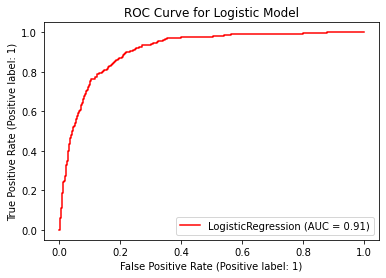

In [14]:
from sklearn import metrics
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
metrics.plot_roc_curve(classifier, X_test, y_test, color = 'red')
plt.title('ROC Curve for Logistic Model')
plt.show()  

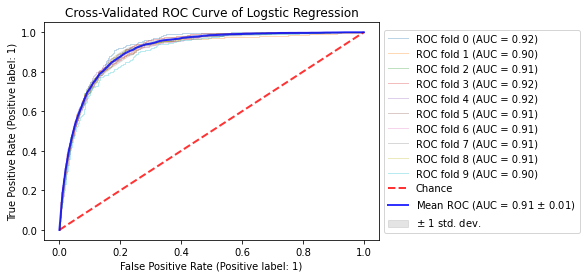

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression(class_weight = 'balanced')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
cv 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Cross-Validated ROC Curve of Logstic Regression")
# ax.legend(loc="lower right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Cross-validation

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy {:.2f} %".format(accuracies.mean()*100))
print("Standard Devation {:.3f} %".format(accuracies.std()*100))

Accuracy 84.08 %
Standard Devation 0.578 %


# Check file

In [17]:
dataset = pd.read_excel('check2021.xlsx')
group = dataset['Group']
seq = dataset['Seq nr']
del dataset['Group']
del dataset['Seq nr']
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,entrepreneur,single,tertiary,no,544,no,yes,cellular,5,feb,401,2,8,3,other
1,36,management,single,tertiary,no,1,yes,no,cellular,13,may,131,1,-1,0,unknown
2,35,technician,married,tertiary,no,358,no,no,cellular,29,aug,92,9,-1,0,unknown
3,71,retired,married,tertiary,no,2651,no,no,cellular,5,feb,531,2,-1,0,unknown
4,45,admin.,married,secondary,no,1097,yes,yes,cellular,2,feb,174,1,208,1,failure


In [18]:
X = dataset.iloc[:, :].values

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3,4,6,7,8,10,15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
y_pred = classifier.predict(X)

In [22]:
cnt = 0
for i in y_pred:
    if i ==1:
        cnt +=1
        
zeros = len(y_pred) - cnt
   
print("yes: ", cnt)
print("no:", zeros)

yes:  1100
no: 4111


In [23]:
pred = []
for i in y_pred:
    if i == 0:
        pred.append('no')
    else:
        pred.append('yes')

In [24]:
dataset.insert(0, "Group", group, True)
dataset.insert(1, "Seq nr", seq, True)
dataset.insert(18, "y", pred, True)
dataset.head()

,Group,Seq nr,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,Training,1,31,entrepreneur,single,tertiary,no,544,no,yes,cellular,5,feb,401,2,8,3,other,yes
1,Training,2,36,management,single,tertiary,no,1,yes,no,cellular,13,may,131,1,-1,0,unknown,no
2,Training,3,35,technician,married,tertiary,no,358,no,no,cellular,29,aug,92,9,-1,0,unknown,no
3,Training,4,71,retired,married,tertiary,no,2651,no,no,cellular,5,feb,531,2,-1,0,unknown,yes
4,Training,5,45,admin.,married,secondary,no,1097,yes,yes,cellular,2,feb,174,1,208,1,failure,no


In [25]:
dataset.to_excel("results2021.xlsx", index = False)